In [46]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from yellowbrick.cluster import KElbowVisualizer
pd.set_option('display.max_columns', 500)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [47]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [48]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [49]:
df.shape

(2240, 29)

In [50]:
df.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* Income has missing values, so I will substitute the missing values with the Income mean since Mean and Median are not so different

In [52]:
df['Income'].mean()

52247.25135379061

In [53]:
#df['Income'] = df[['Income']].fillna(df['Income'].mean())

In [54]:
#Dropping missing values

df = df.dropna()

df.shape

(2216, 29)

In [55]:
#Transforming Dt_Customer into datetime

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [56]:
#Creating a variable of how long client has been part of the store. Reference will be most recent client in database

newes_client = df["Dt_Customer"].max()

df['customer_for'] = newes_client -  df["Dt_Customer"]

#Converting day type to numeric

df['customer_for'] = df['customer_for'].astype('timedelta64[D]')

In [57]:
df["Marital_Status"].value_counts()/df["Marital_Status"].shape[0]

Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: Marital_Status, dtype: float64

* 63% of the clients are Married or Together with someone

In [58]:
#Client Age
df['customer_age'] = 2021 - df['Year_Birth']

#Total spendings on products
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Mariage situation
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# Summing the Kidhome and Teenhome to create variable with house with children
df["Children"]=df["Kidhome"]+df["Teenhome"]

#People living in the house
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Variable denotinf if the client is a parent
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


In [59]:
#Renaming columns

df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [60]:
#Variables that won't be used

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [61]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,customer_for,customer_age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971.0,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125.0,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472.0,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65.0,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321.0,40,422,Partner,1,3,1


In [62]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.25,25173.08,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.44,0.54,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.51,0.54,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.01,28.95,0.0,24.0,49.0,74.00,99.0
Wines,2216.0,305.09,337.33,0.0,24.0,174.5,505.00,1493.0
Fruits,2216.0,26.36,39.79,0.0,2.0,8.0,33.00,199.0
Meat,2216.0,167.00,224.28,0.0,16.0,68.0,232.25,1725.0
Fish,2216.0,37.64,54.75,0.0,3.0,12.0,50.00,259.0
Sweets,2216.0,27.03,41.07,0.0,1.0,8.0,33.00,262.0
Gold,2216.0,43.97,51.82,0.0,9.0,24.5,56.00,321.0


* Customer age max seems to be an outlier. Plotting Age boxplot to indentify all possible outliers

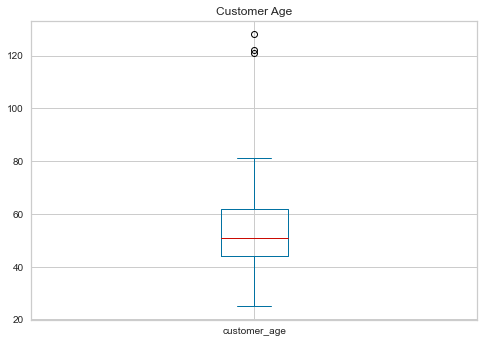

In [63]:
df.customer_age.plot(kind='box')

plt.title('Customer Age')

plt.show()

* Given that customer over the age of 100 years are improbable, they will be removed from the database considered as outliers


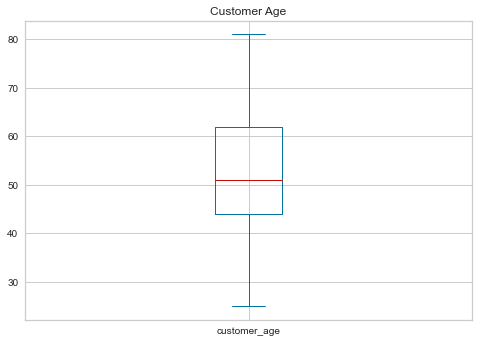

In [64]:

df = df[df.customer_age<100]
df.customer_age.plot(kind='box')

plt.title('Customer Age')

plt.show()

* Customer Income also seemed to have an oddly high income compared to data mean

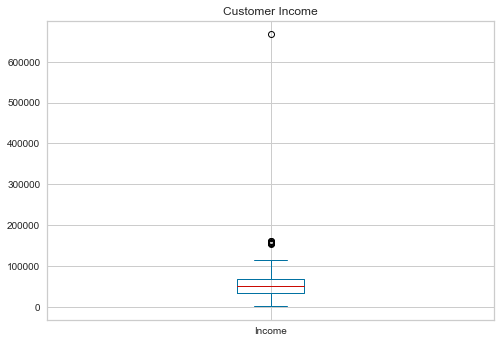

In [65]:
df.Income.plot(kind='box')

plt.title('Customer Income')

plt.show()

* Removing al customers with income above 600.000k

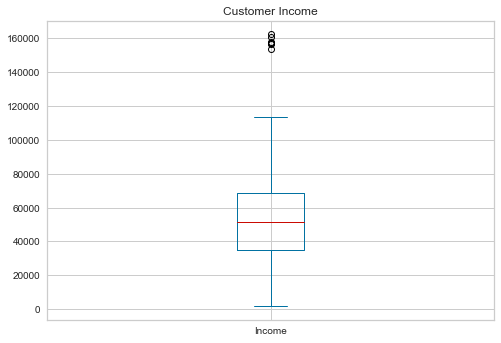

In [66]:
df = df[df.Income < 600000]
df.Income.plot(kind='box')
plt.title('Customer Income')

plt.show()

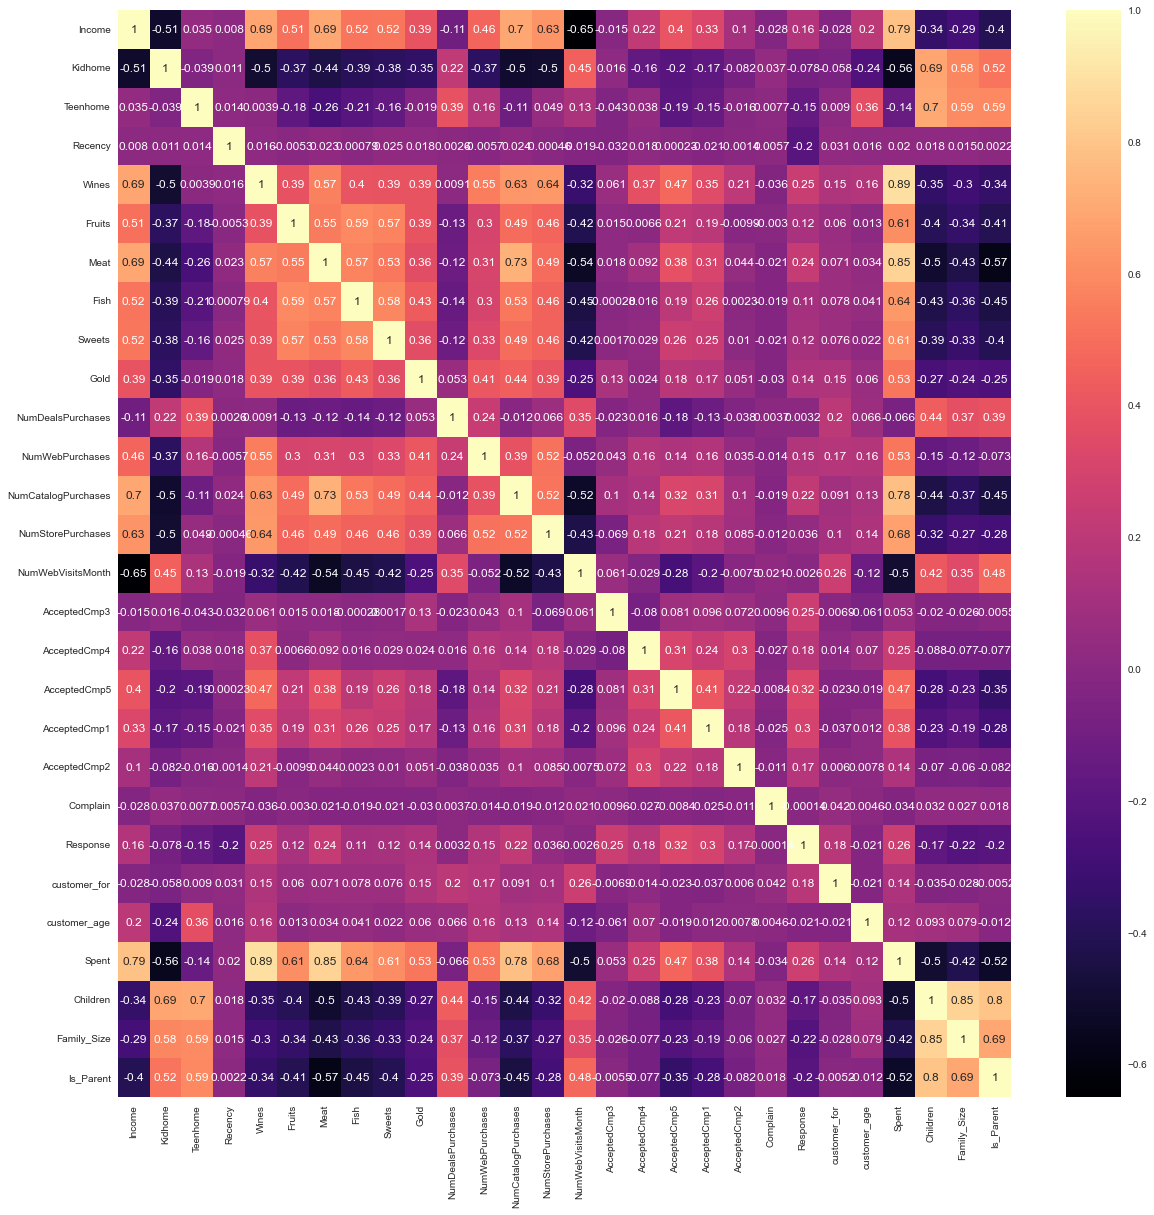

In [67]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True, cmap='magma')

plt.show()

### DATA PREPROCESSING

In [68]:
#Getting a list of Object variables

object_variables = (df.dtypes == 'object')

object_variables = list(object_variables[object_variables].index)

object_variables

['Education', 'Living_With']

In [69]:
#Label enconding the Object variables

LE = LabelEncoder()

for i in object_variables:

    df[i] = df[[i]].apply(LE.fit_transform)


In [70]:
#Creating a copy of the data

ds = df.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

In [71]:
#Fitting data to scaler to normalize values to same scale

scaler = StandardScaler()

scaler.fit(ds)

scaled_ds = pd.DataFrame(scaler.transform(ds), columns = ds.columns)


In [72]:
scaled_ds.describe().round(2)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,customer_for,customer_age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00
mean,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.89,-2.33,-0.82,-0.93,-1.69,-0.91,-0.66,-0.74,-0.69,-0.66,-0.85,-1.21,-1.49,-0.91,-1.79,-2.19,-2.20,-2.32,-1.00,-1.35,-1.26,-1.76,-1.58
25%,-0.89,-0.78,-0.82,-0.93,-0.86,-0.83,-0.61,-0.67,-0.63,-0.63,-0.68,-0.69,-0.76,-0.91,-0.86,-0.96,-0.74,-0.69,-0.89,-1.35,-1.26,-0.65,-1.58
50%,-0.89,-0.03,-0.82,-0.93,-0.00,-0.38,-0.46,-0.44,-0.47,-0.46,-0.38,-0.17,-0.03,-0.23,-0.25,0.28,0.00,-0.09,-0.35,0.74,0.07,0.45,0.63
75%,0.57,0.77,1.04,0.91,0.86,0.59,0.17,0.29,0.23,0.14,0.23,0.35,0.70,0.45,0.67,0.69,0.75,0.85,0.73,0.74,0.07,0.45,0.63
max,2.04,5.13,2.90,2.75,1.73,3.52,4.35,6.95,4.04,5.72,5.36,6.59,8.36,8.65,2.21,6.05,2.37,2.47,3.18,0.74,2.74,2.66,0.63


In [73]:
scaled_ds.shape

(2212, 23)

#### Reducing Dimensionalities with PCA


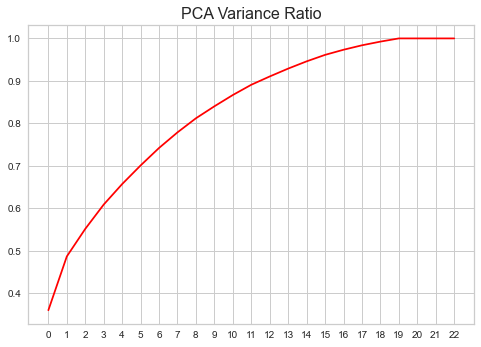

In [74]:
pca = PCA(n_components=23)

pca.fit(scaled_ds)

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='red')

plt.title('PCA Variance Ratio', fontsize=16)

plt.xticks(np.arange(0, 23, 1))

plt.show()

In [75]:
for i in range(len(pca.explained_variance_ratio_)):
    print('PC %2d  ->  %3.3f%%  Cumulative: %2.2f%%' % (i, pca.explained_variance_ratio_[i], np.cumsum(pca.explained_variance_ratio_)[i] ))

PC  0  ->  0.360%  Cumulative: 0.36%
PC  1  ->  0.127%  Cumulative: 0.49%
PC  2  ->  0.065%  Cumulative: 0.55%
PC  3  ->  0.057%  Cumulative: 0.61%
PC  4  ->  0.048%  Cumulative: 0.66%
PC  5  ->  0.044%  Cumulative: 0.70%
PC  6  ->  0.041%  Cumulative: 0.74%
PC  7  ->  0.037%  Cumulative: 0.78%
PC  8  ->  0.033%  Cumulative: 0.81%
PC  9  ->  0.028%  Cumulative: 0.84%
PC 10  ->  0.027%  Cumulative: 0.87%
PC 11  ->  0.024%  Cumulative: 0.89%
PC 12  ->  0.020%  Cumulative: 0.91%
PC 13  ->  0.019%  Cumulative: 0.93%
PC 14  ->  0.017%  Cumulative: 0.95%
PC 15  ->  0.015%  Cumulative: 0.96%
PC 16  ->  0.012%  Cumulative: 0.97%
PC 17  ->  0.010%  Cumulative: 0.98%
PC 18  ->  0.009%  Cumulative: 0.99%
PC 19  ->  0.008%  Cumulative: 1.00%
PC 20  ->  0.000%  Cumulative: 1.00%
PC 21  ->  0.000%  Cumulative: 1.00%
PC 22  ->  0.000%  Cumulative: 1.00%


Using the first 13 components Variance Ratio shows that we will lose less than 10% of ou information

In [76]:
pca = PCA(n_components=13)

pca.fit(scaled_ds)

pca.explained_variance_ratio_.sum()

PCA_ds = pd.DataFrame(pca.transform(scaled_ds))

PCA_ds

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.994347,-0.151247,2.647792,-0.151491,0.991784,-0.574264,-0.624872,-1.114653,1.830784,0.817346,1.035748,-0.581437,1.252217
1,-2.884455,-0.006676,-1.863861,-1.472022,1.788765,0.549587,0.064884,-0.032784,0.733179,0.541116,0.298175,-0.461595,0.103557
2,2.617864,-0.720770,-0.252259,-0.034561,-0.641760,0.599061,-1.615866,0.057634,-0.742981,-0.543140,0.939822,-0.151452,-1.093624
3,-2.676036,-1.541974,-0.922759,1.190909,0.585116,1.057183,-0.589718,1.113229,-0.989177,0.134882,0.605317,0.122683,-0.154669
4,-0.649591,0.209848,-0.021028,1.659558,0.289104,-0.944834,1.388581,0.660560,-0.889756,0.321708,1.152065,0.747197,-0.353831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2.321341,2.436277,0.518645,0.652558,0.598568,0.112828,-1.458323,-1.118143,-2.031768,1.068882,-1.166875,-1.478032,1.623786
2208,-3.105957,4.020968,-1.499273,0.473705,0.064328,0.237460,1.391919,0.986476,0.254189,1.642890,2.560521,-1.133273,-0.603465
2209,2.673666,-1.869157,0.594264,-1.046906,0.833747,-1.197525,0.193778,1.947638,-0.722190,-1.064559,0.195292,0.155953,-1.587350
2210,1.494055,1.701855,-1.627265,-0.531814,-0.965947,1.415128,-0.046320,-0.341249,-0.407117,0.058453,-0.109983,0.100378,-0.279991


In [77]:
PCA_ds.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
0,2212.0,0.0,2.88,-5.97,-2.54,-0.78,2.38,7.44
1,2212.0,0.0,1.71,-4.31,-1.33,-0.16,1.24,6.14
2,2212.0,0.0,1.22,-3.53,-0.83,-0.02,0.80,6.62
3,2212.0,0.0,1.15,-3.12,-0.76,-0.01,0.90,3.39
4,2212.0,-0.0,1.05,-3.07,-0.74,0.01,0.69,3.11
5,2212.0,-0.0,1.00,-2.29,-0.83,0.01,0.81,2.47
6,2212.0,-0.0,0.97,-3.36,-0.70,-0.04,0.64,3.52
7,2212.0,-0.0,0.92,-4.37,-0.53,0.05,0.55,4.48
8,2212.0,0.0,0.87,-5.15,-0.55,0.00,0.54,6.66
9,2212.0,0.0,0.81,-2.40,-0.47,-0.05,0.41,6.16


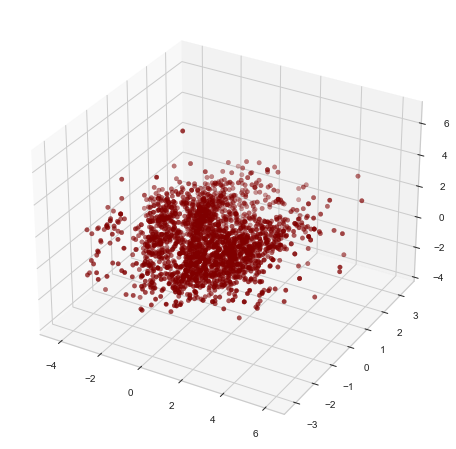

In [78]:
#3D projection of the data with reduced dimension

x = PCA_ds[1]
y = PCA_ds[2]
z = PCA_ds[3]

# PLOTTING

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,z,y, c='maroon', marker='o')

## CLUSTERING


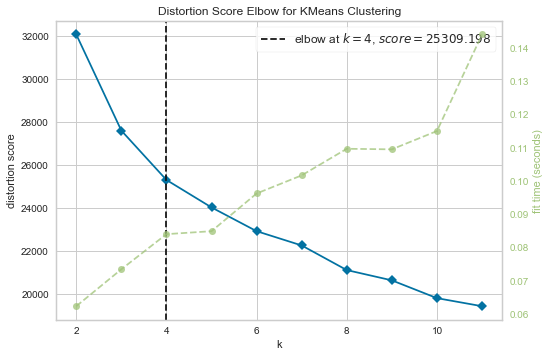

In [79]:
#Using the elow method to identify the ideal number of clusters to be used

elbowM = KElbowVisualizer(KMeans(), k = 11)

elbowM.fit(PCA_ds)

elbowM.show()

plt.show()

* 4 clusters seem to be ideal

In [80]:
#Agglomerative Clustering

AC = AgglomerativeClustering(n_clusters=4)

# Fitting model and predcting clusters

yhat_AC = AC.fit_predict(PCA_ds)

PCA_ds['clusters'] = yhat_AC

ds['clusters'] = yhat_AC

In [81]:
PCA_ds

,0,1,2,3,4,5,6,7,8,9,10,11,12,clusters
0,4.994347,-0.151247,2.647792,-0.151491,0.991784,-0.574264,-0.624872,-1.114653,1.830784,0.817346,1.035748,-0.581437,1.252217,3
1,-2.884455,-0.006676,-1.863861,-1.472022,1.788765,0.549587,0.064884,-0.032784,0.733179,0.541116,0.298175,-0.461595,0.103557,1
2,2.617864,-0.720770,-0.252259,-0.034561,-0.641760,0.599061,-1.615866,0.057634,-0.742981,-0.543140,0.939822,-0.151452,-1.093624,3
3,-2.676036,-1.541974,-0.922759,1.190909,0.585116,1.057183,-0.589718,1.113229,-0.989177,0.134882,0.605317,0.122683,-0.154669,0
4,-0.649591,0.209848,-0.021028,1.659558,0.289104,-0.944834,1.388581,0.660560,-0.889756,0.321708,1.152065,0.747197,-0.353831,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2.321341,2.436277,0.518645,0.652558,0.598568,0.112828,-1.458323,-1.118143,-2.031768,1.068882,-1.166875,-1.478032,1.623786,2
2208,-3.105957,4.020968,-1.499273,0.473705,0.064328,0.237460,1.391919,0.986476,0.254189,1.642890,2.560521,-1.133273,-0.603465,2
2209,2.673666,-1.869157,0.594264,-1.046906,0.833747,-1.197525,0.193778,1.947638,-0.722190,-1.064559,0.195292,0.155953,-1.587350,3
2210,1.494055,1.701855,-1.627265,-0.531814,-0.965947,1.415128,-0.046320,-0.341249,-0.407117,0.058453,-0.109983,0.100378,-0.279991,2


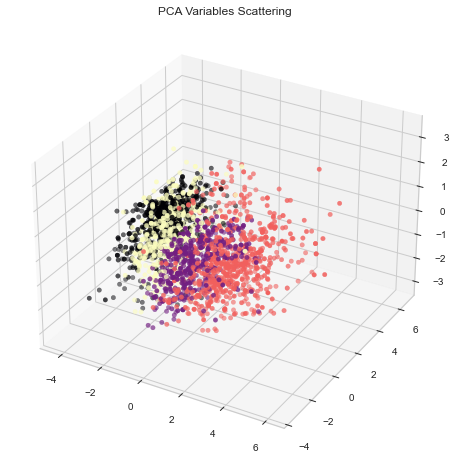

In [82]:
# PLOTTING

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d', label='bla')

ax.scatter(x,y,z, marker='o', c = PCA_ds['clusters'], cmap='magma')

plt.title('PCA Variables Scattering')

plt.show()

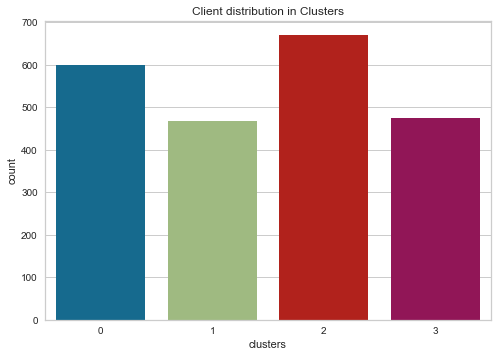

In [83]:
sns.countplot(x = PCA_ds['clusters'])

plt.title('Client distribution in Clusters')

plt.show()

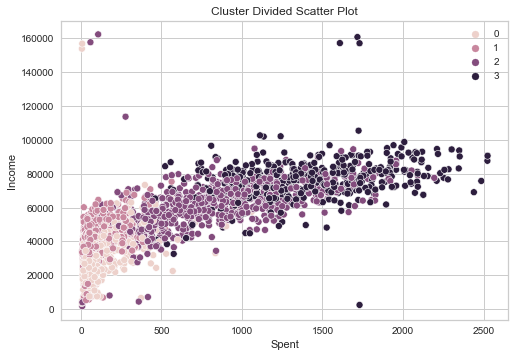

In [84]:
graf = sns.scatterplot(data=ds, x=ds['Spent'], y=ds['Income'], hue=ds['clusters'])
plt.legend()
plt.title('Cluster Divided Scatter Plot')
plt.show()

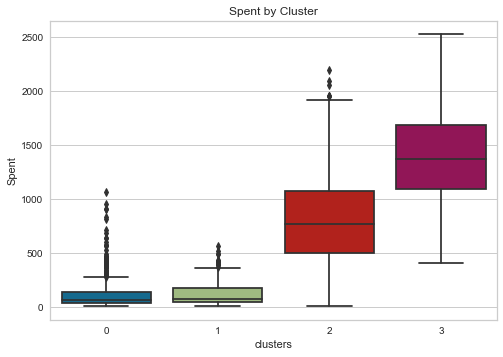

In [85]:
sns.boxplot(y = 'Spent', x = 'clusters', data=ds)

plt.title('Spent by Cluster')

plt.show()

* Clusters 2 and 3 have consist of clients that spend more whereas 0 and 1 have clients spending less
* Even the outliers in Cluster 1 spend less than over 75% of Cluster 3 clients

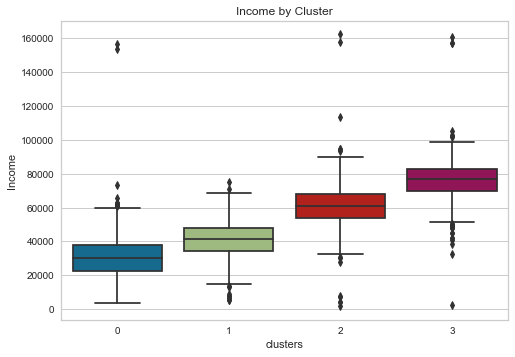

In [86]:
sns.boxplot(y = 'Income', x = 'clusters', data=ds)

plt.title('Income by Cluster')

plt.show()

* Income by cluster follows the pattern seen in spending. Cluster 2 and 3 have the highest incomes
* But it is intersting to notice that clusters 2 and 3 have outliers with Income as high as the highest earning incomes but they do not spend as much, it might be due to other factors that might show up in the analysis or it was the decisive variable that places them in different clusters

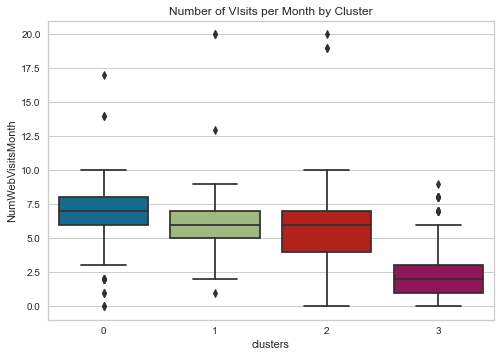

In [87]:
sns.boxplot(y = 'NumWebVisitsMonth', x = 'clusters', data=ds)

plt.title('Number of VIsits per Month by Cluster')

plt.show()

* Interesting to notice that clusters 0 and 1 with lowest incomes and spending in the stores are the ones with the highest number of visits per month. It might be due to a series of reasons. For example:
 1. Maybe people in clusters 0 and 1 access the websites more times in the month to check for promotions so they can save more money
 2. Clients in clusters 2 and 3 may do their purchases all at once or weekly
 3. Clients in clusters 2 and 3 might prefer to do their purchases in the store rather than online

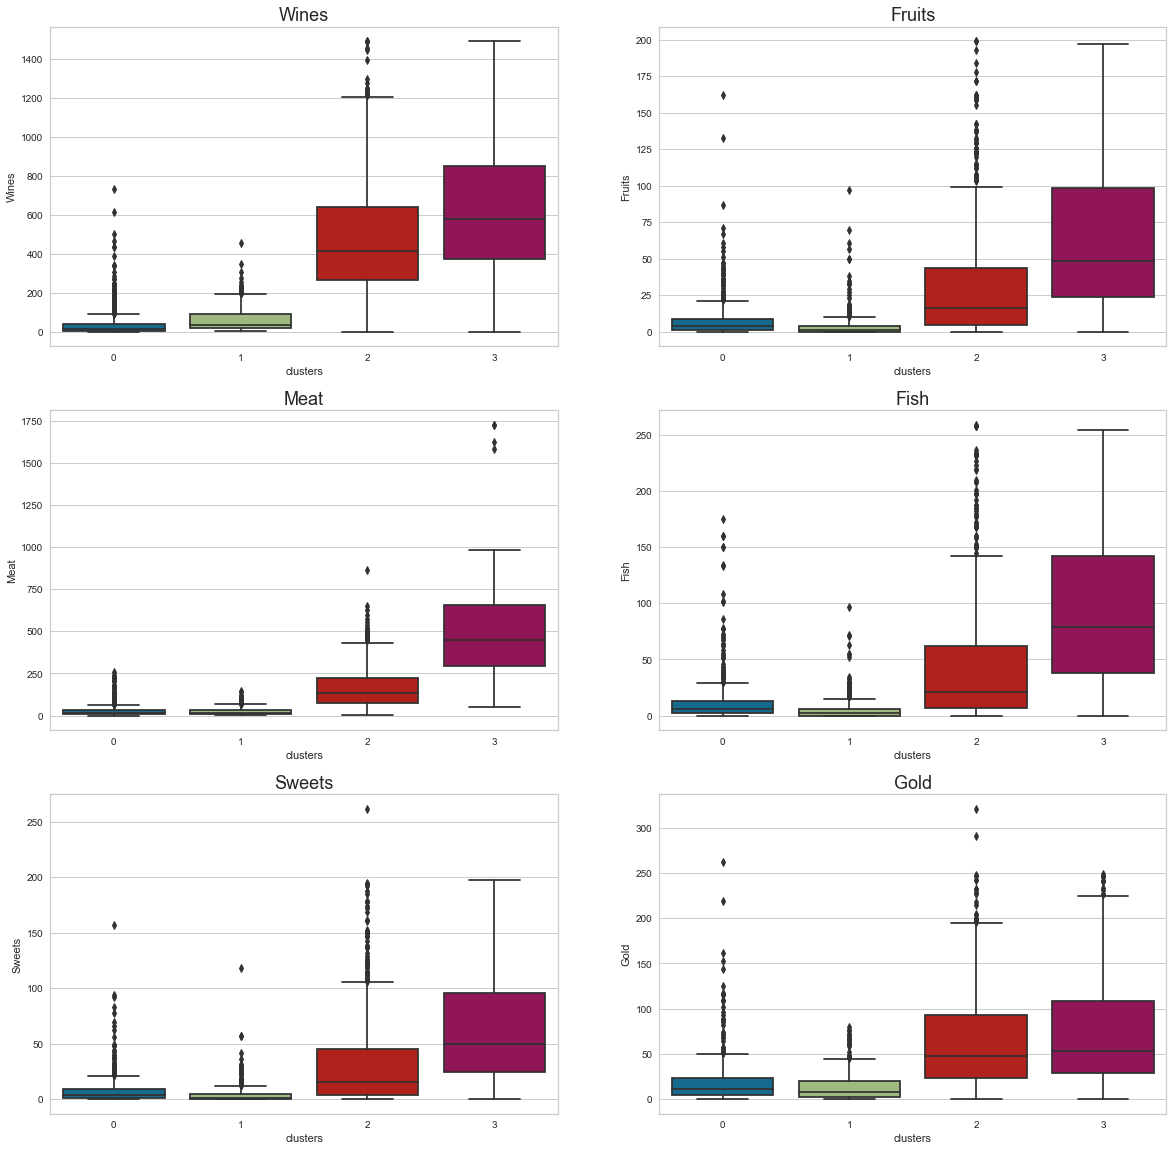

In [88]:
#Plotting product types to understand their distribution in each cluster

products = [ 'Wines','Fruits', 'Meat', 'Fish', 'Sweets', 'Gold' ]

fig, axes = plt.subplots(3,2, figsize=(20,20))

column = 0
row = 0
for product in products:

    if column > 1:

        row += 1
        column = 0

    sns.boxplot(x='clusters', y=product, data=ds, ax = axes[row][column])

    axes[row][column].set_title(product, fontsize=18)

    column += 1
    

* Product types follow the same rule for spending but it is interesting to notice that meat consuption has more discrepancies between groups highest and lowest income clusters

In [89]:
ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,customer_for,customer_age,Spent,Living_With,Children,Family_Size,Is_Parent,clusters
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,971.0,64,1617,0,0,1,0,3
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,125.0,67,27,0,2,3,1,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,472.0,56,776,1,0,2,0,3
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,65.0,37,53,1,1,3,1,0
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,321.0,40,422,1,1,3,1,0


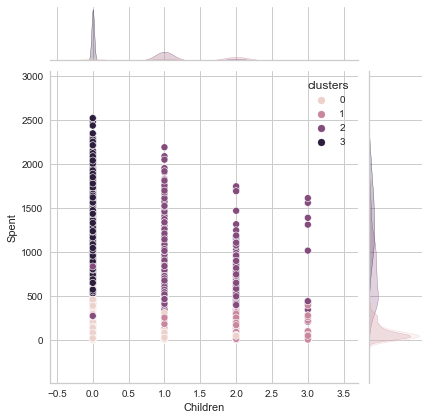

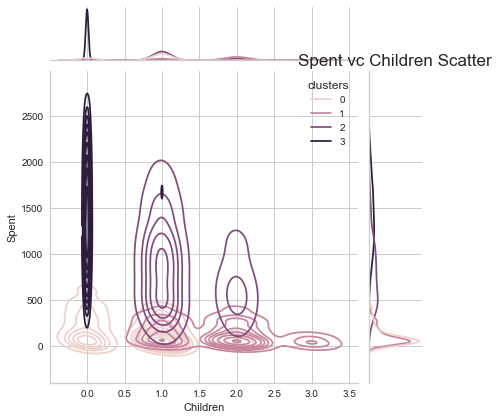

In [90]:
sns.jointplot(y=ds['Spent'], x=ds['Children'], hue=ds['clusters'])
sns.jointplot(y=ds['Spent'], x=ds['Children'], hue=ds['clusters'], kind='kde')

plt.title('Spent vc Children Scatter', fontsize=17)

plt.show()

* This plot shows clearly that clients in cluster 3 are not parents, whereas all the other cluster will contain clients with children
* On the other hand, clients in clusters 1 and 2 all have children, a marketing action directed to these clients with promotions focused on children products might be a good idea, specially on the internet where they are more active as seen in boxplots above